In [5]:
import sys
import importlib

import random
import numpy as np

import matplotlib.pyplot as plt
%matplotlib widget

sys.path.append('../')
from analysis.utils import outputs as out
from analysis.utils import sample_info as si
from analysis.utils import plotting as p
from analysis.utils import fitting as fit


Using 'old' tuple versions because I haven't fully processes the next version yet.

In [2]:
tuple_version = si.get_tuple_version('old')
mass_grid = si.get_mass_grid('old')

tuple_version

'FlatAODv3'

Start by fitting the signal points, I want to do an unbinned fit so I need to save arrays of all the values. I fit the signal with a double crystal ball function and use a linear model to find the lower and upper 95% confidence limits for the BKK and Radion masses.

The original plan was to use a linear model to regress the relationship between the masses and the upper/lower limits, this option can be enabled by setting regression to "True", however more work is needed before this will look good.

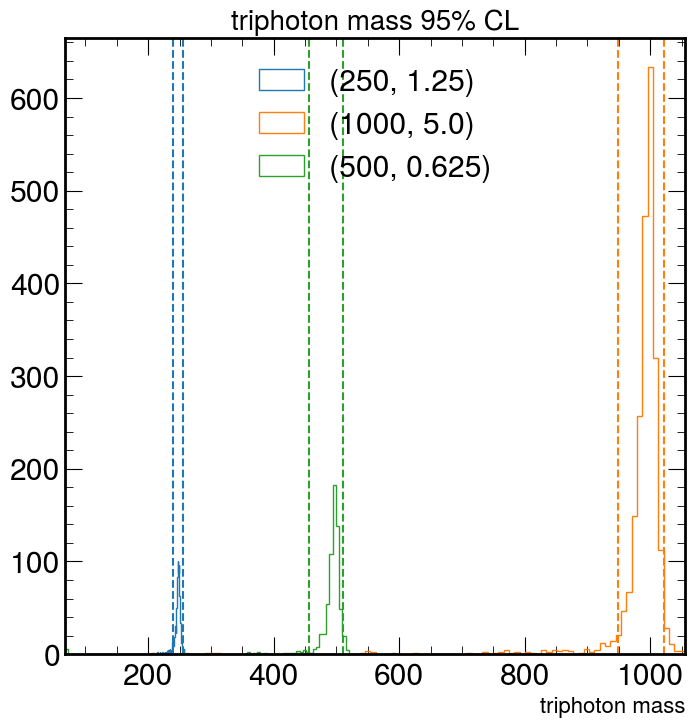

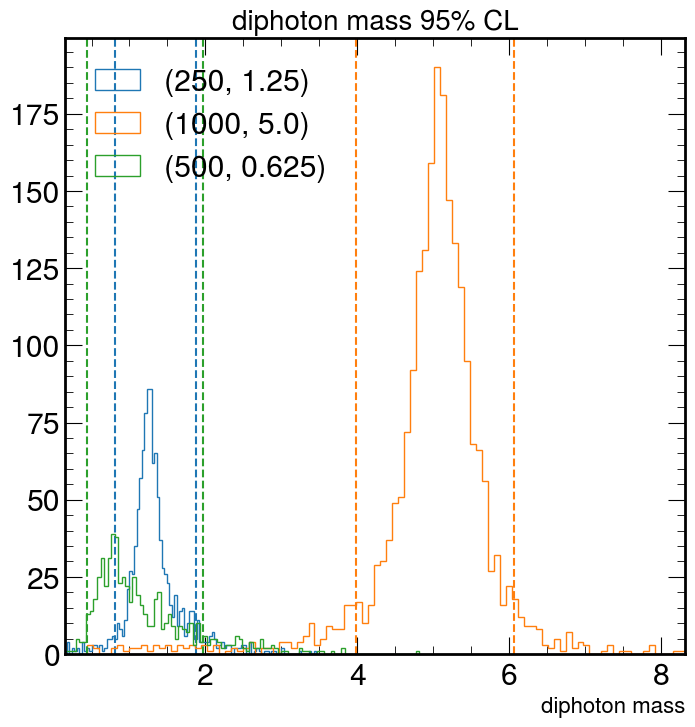

In [31]:
importlib.reload(si)
importlib.reload(fit)

fit.plot_signal_CL(random.sample(mass_grid, 3), tuple_version=tuple_version, regression = False, refit=False)

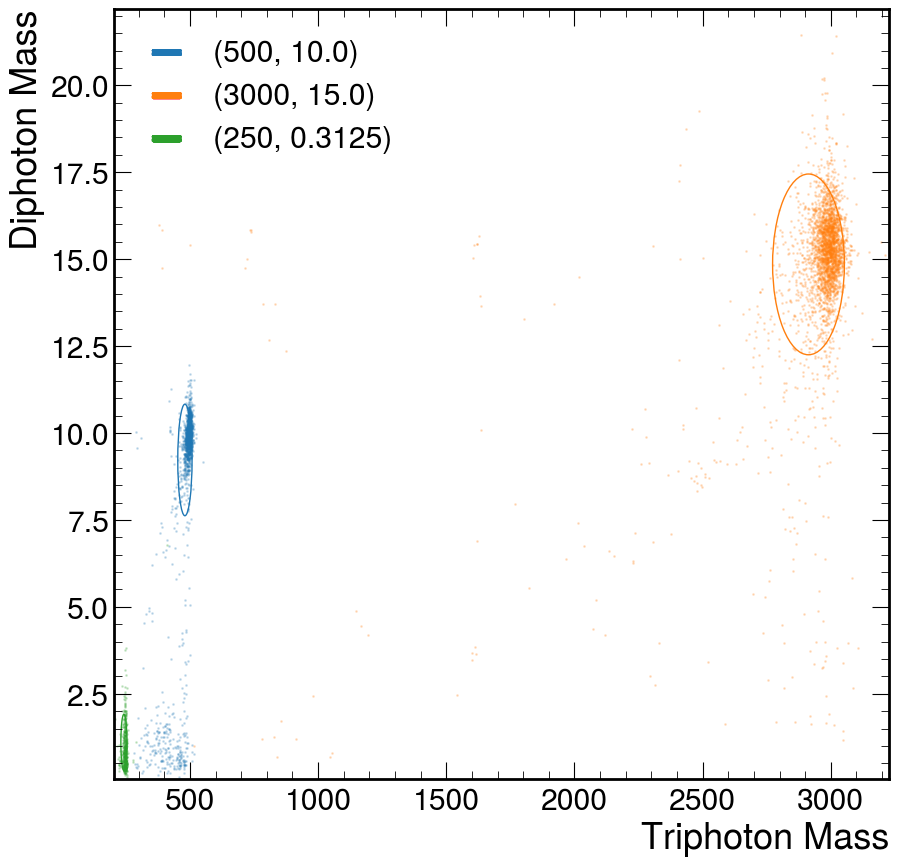

In [43]:
importlib.reload(fit)

fit.plot_signal_CL_ellipse(random.sample(mass_grid, 3), tuple_version=tuple_version, regression = False, refit=False)

In [12]:
from analysis.workflows import explore
importlib.reload(si)

importlib.reload(explore)
importlib.reload(out)

signal_hists = out.get_outputs('signal', workflow='explore', tuple_version=tuple_version, n_jobs=6)
data_hists = out.get_outputs('data', workflow='explore', tuple_version=tuple_version, n_jobs=6)

Histograms do not exist, creating them now


Output()

Output()

Exception: Failed processing file: WorkItem(dataset='BkkToGRadionToGGG_M1-3000_R0-3p75', filename='/hadoop/store/user/atownse2/RSTriPhoton/signal/2018/FlatAODv3/BkkToGRadionToGGG_M1-3000_R0-3p75_2018_FlatAODv3_4.root', treename='/flattener/tree', entrystart=0, entrystop=1000, fileuuid=b'\xc7\x9f\x17\xdawl\x11\xee\xb4~gV \n\xbe\xef', usermeta={})

Now that I have the mass windows I need to determine the optimal cuts. To do this I will fill a $N_{cuts}$ dimensional histogram for each mass window and dataset (signal, data). By appropriately slicing this histogram I can calculate the significance at each point in the $N_{cuts}$ dimensional space.

In [24]:
importlib.reload(explore)
# Get histograms
hists_signal = h.get_outputs('signal', workflow='explore')
hists_data = h.get_outputs('data', workflow='explore')

Getting histograms for signal 2018 FlatAODv3 explore
Histograms already exist, loading them now
Getting histograms for data 2018 FlatAODv3 explore
Histograms already exist, loading them now


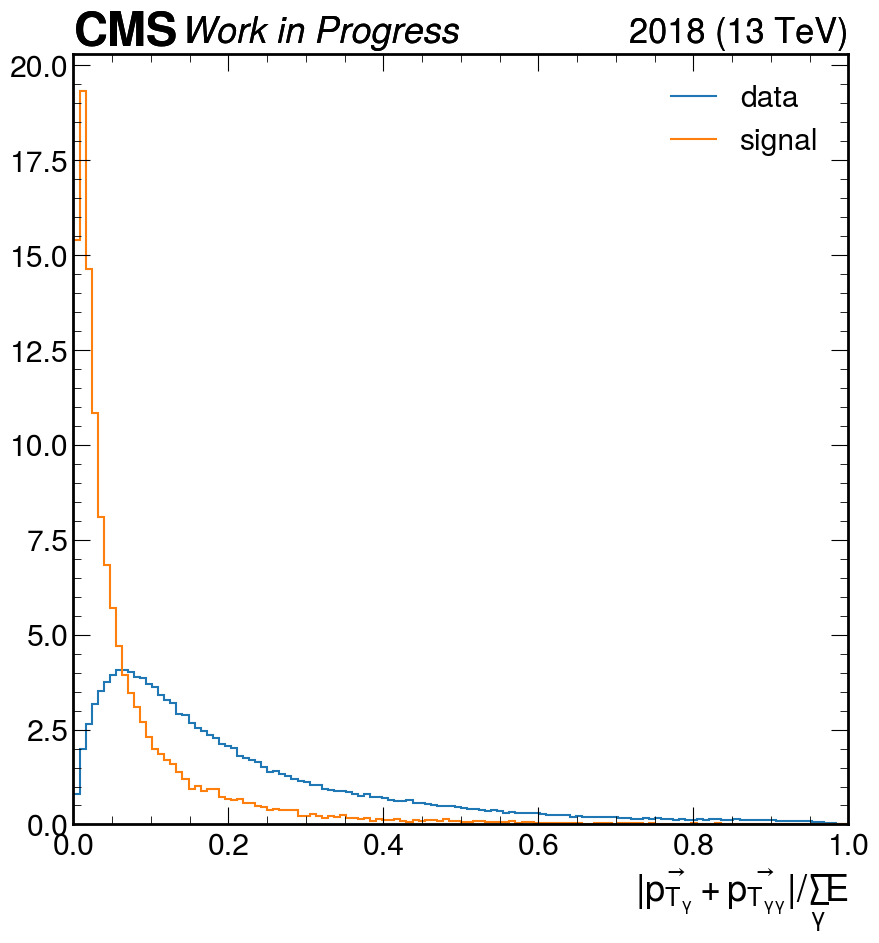

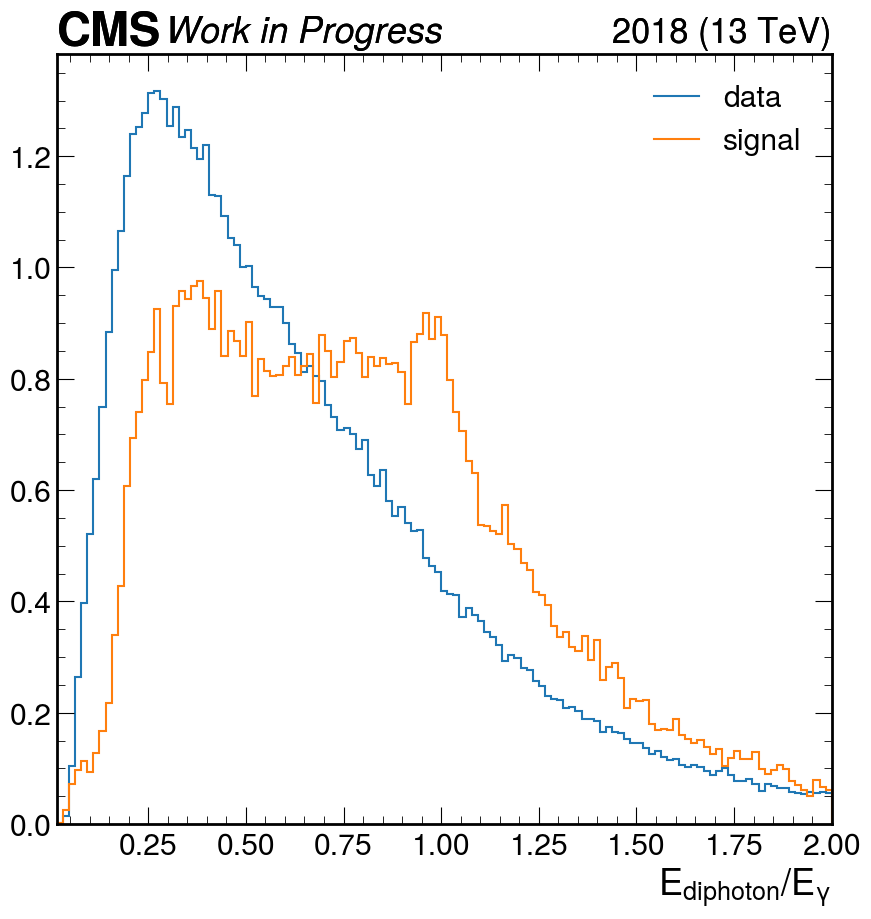

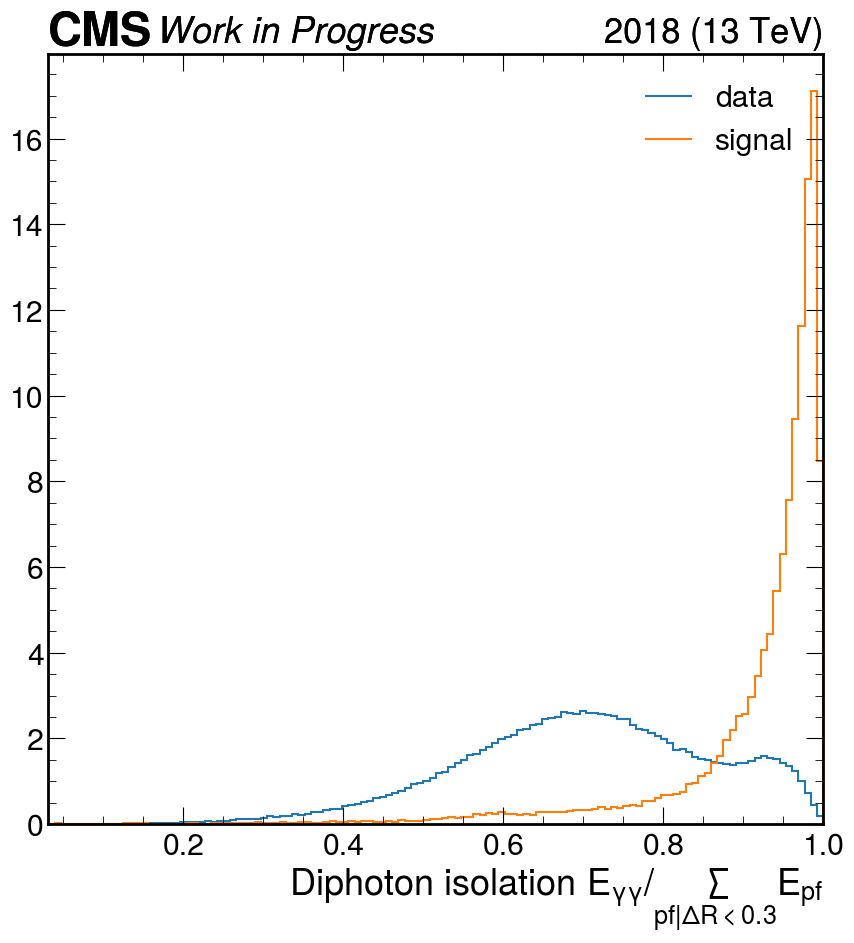

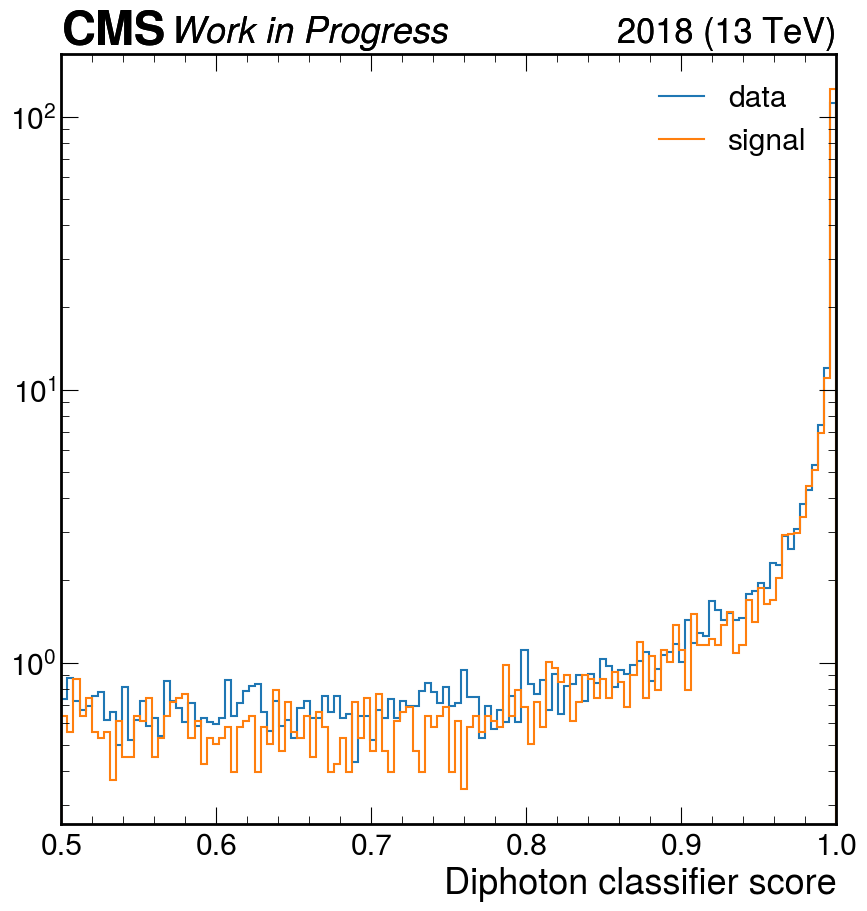

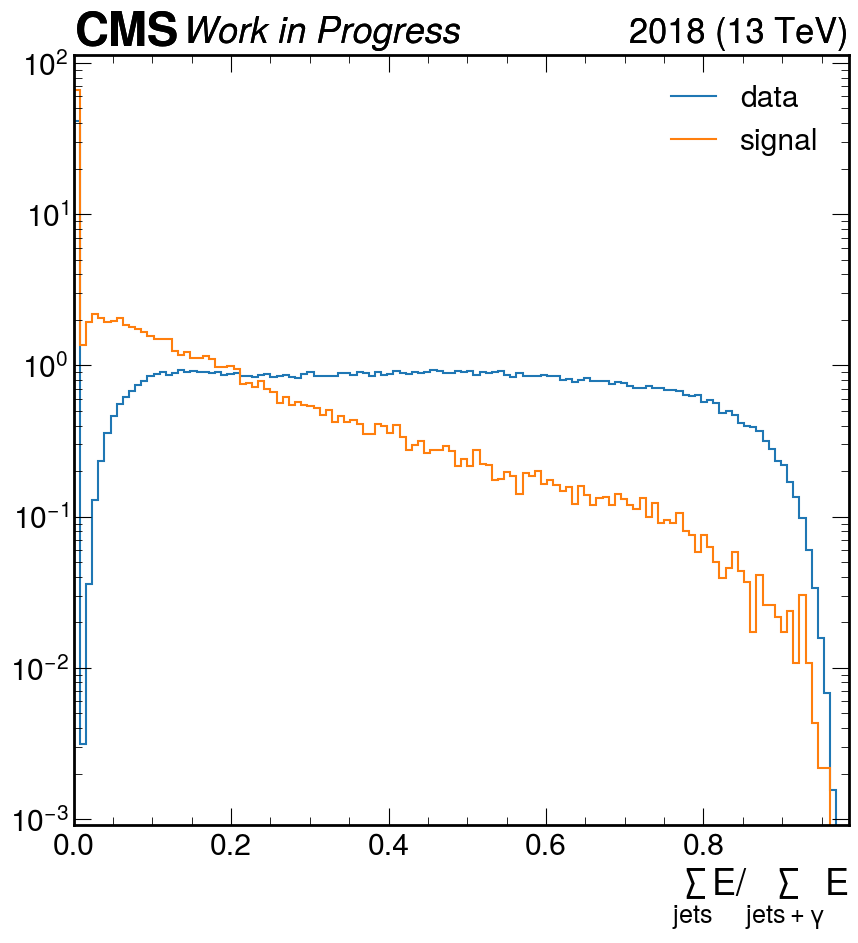

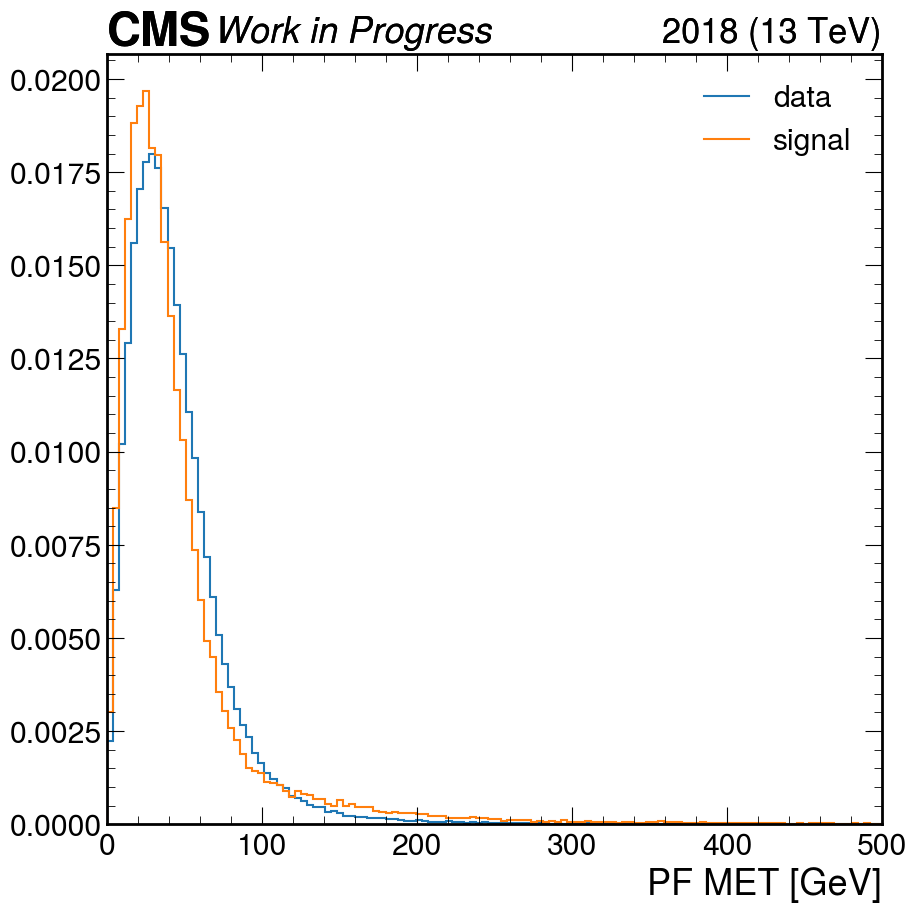

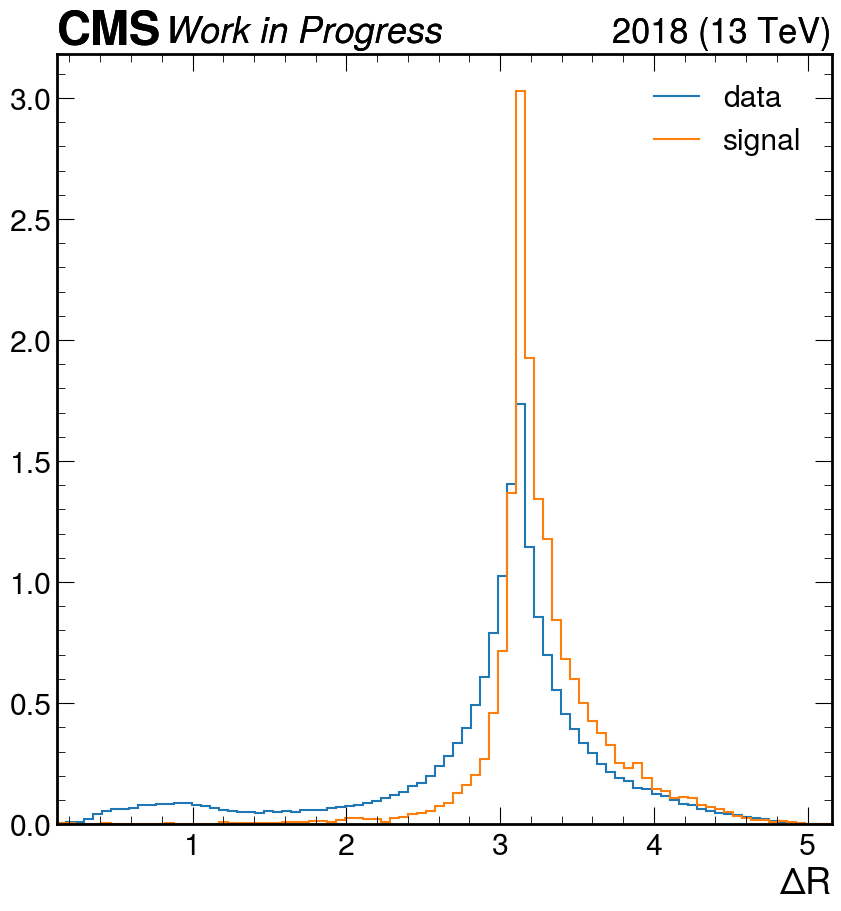

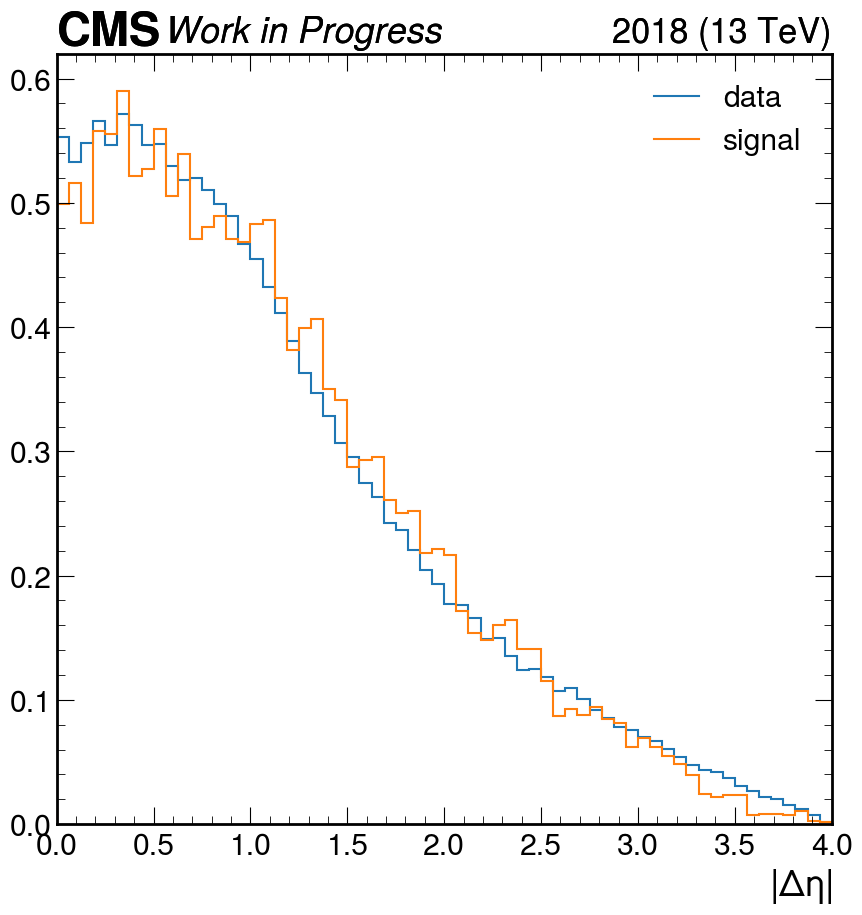

In [25]:
importlib.reload(p)
# Exploratory analysis to determine cut binning
cut_vars = ['ket_frac', 'energy_ratio', 'diphoton_isolation', 'diphoton_score', 'pc_hadronic_energy', 'pf_met', 'delta_r', 'delta_eta']

# Plot histograms
for var in cut_vars:
    setlogy = None
    if var == 'pc_hadronic_energy' or var == 'diphoton_score':
        setlogy = True

    hist_data = hists_data[var][{'dataset':sum}]
    hist_signal = hists_signal[var][{'dataset':sum}]
    p.plot1ds([hist_data, hist_signal], labels=['data', 'signal'], cms_label='Work in Progress', is_data=True, setlogy=setlogy, density=True)